# Vehicle dataset

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning. It contains information about 98 car brands. In this post, we will perform exploratory data analysis on the Cars Dataset. The data can be found here.
The columns in the given dataset are as follows:


## Data

Data contains 8 columns.


**Name**: This column represents contains names of cars.

**Year**: This column represents years of cars

**Selling_price**: This column represents Car's selling price

**Km_driven**: It refers to how much distance (in kilometres) the car had travelled.

**Fuel_Type**: A motor fuel (Diesel,Petrol,CNG) is a fuel that is used to provide power to the motor in motor vehicles. 

**Seller_type**: Defines whether the seller is a dealer or an individual.

**Transmission** This column represents whether the car is manual or automatic.

**Owner**: This column represents the person who bought the car or the person who has been gifted the vehicle.


# Import libraries

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import arcticdata.ExploratoryDataAnalysis as eda

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler # Standard Scaler
from sklearn.preprocessing import LabelEncoder # Label Encoder

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report #for classification_report matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation

# Regression algorithms 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor #KNN
from sklearn.svm import SVR #SVR
from sklearn.tree import DecisionTreeRegressor #Decision Tree
from sklearn.ensemble import RandomForestRegressor #Random Forest
from xgboost import XGBRegressor # XGBoost 
from lightgbm import LGBMRegressor # Light Gadient Boosting 
from sklearn.ensemble import GradientBoostingRegressor # Gradient 
from sklearn.ensemble import AdaBoostRegressor # AdaBoost 
from sklearn.ensemble import BaggingRegressor # Bagging


#### Read data

In [2]:
Cars = pd.read_csv("car data.csv")

In [3]:
Cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### View summary of dataset <a class="anchor" id="4.5"></a>

In [4]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### Comment

- We can see that the dataset contains mixture of categorical and numerical variables.

- Categorical variables have data type `object`.

- Numerical variables have data type `float64`.

In [5]:
# Shape of data
Cars.shape

(301, 9)

In [6]:
# Null values of data
Cars.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

We have total 301 rows and 9 columns. Gender columns has two attribute Male & Female. Our Target Column is Selling_Price. There is no missing value in our dataset.

In [7]:
# Statistical Summary
Cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


From describe table we get that Year is spread up 35000000, with an average of 2013.62 and Std Dev of 2.89 & Estimated Salary between 15000 to 150,000, with an average of 69,742.5 and Std Dev of 34,096.96.

# Data visualization

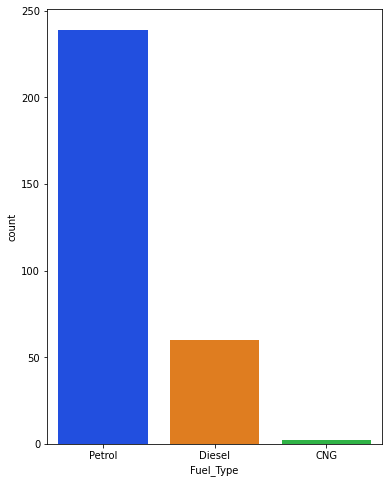

In [8]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="Fuel_Type", data=Cars, palette="bright")
plt.show()

In [9]:
Cars['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [10]:
#The number of Petrol use is lot more than the number of others. 

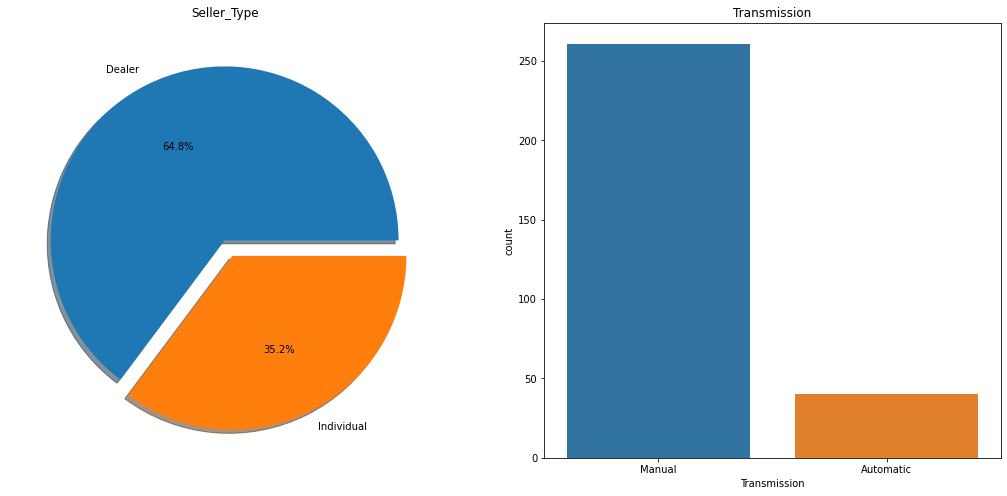

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
Cars['Seller_Type'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Seller_Type')
ax[0].set_ylabel('')
sns.countplot('Transmission',data=Cars,ax=ax[1])
ax[1].set_title('Transmission')
plt.show()

It is clear that Dealer of Seller type used than Individual. 

Look transmission features, mostly used manual cars than automatic.

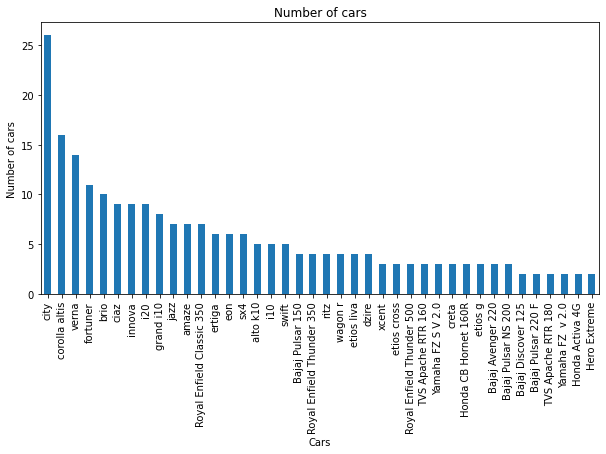

In [12]:
Cars.Car_Name.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars")
plt.ylabel('Number of cars')
plt.xlabel('Cars');

Most of the car names are city, corolla altis, verna and fotruner.

The feature Owner is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 11
-Outliers   3*IQR: 11


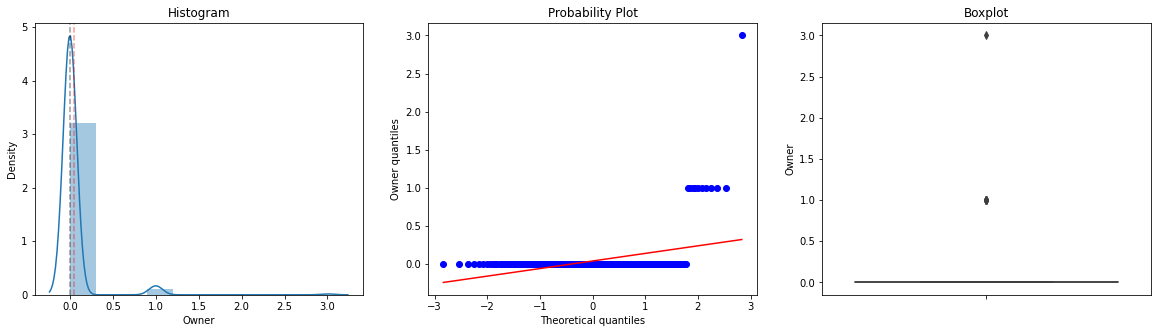

In [13]:
eda.feature_analysis(Cars,'Owner')

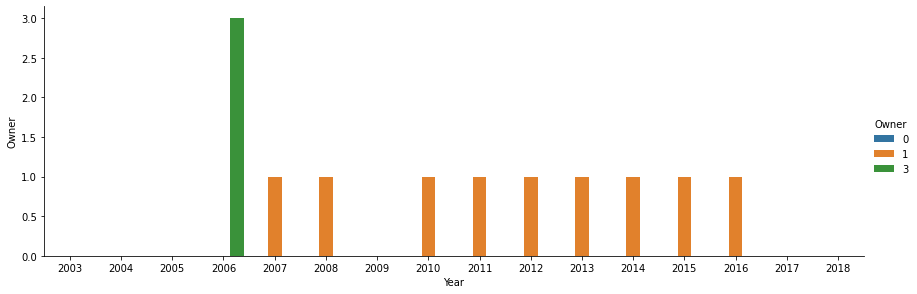

In [14]:
ax = sns.catplot(x="Year", y="Owner", hue="Owner", kind="bar", data=Cars, height=4, aspect=3,)


Mostly categorical data 3 in 2006 was selled. in other years type 1 was selled. 

### Encoding

In [15]:
# Type of data
Cars.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [16]:


lab = LabelEncoder()

In [17]:
# # Encoding object Data

def convert_dtype(df):
    """ iterate through all the columns of a dataframe and change the data type
        of object.        
    """     
    objects = []
    for i in df.columns:
        if(df[i].dtype == np.object):
            objects.append(i)
            df[i] = lab.fit_transform(df[i])
            
a = convert_dtype(Cars)

In [18]:
Cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,1,0,1,0
297,66,2015,4.00,5.90,60000,2,0,1,0
298,69,2009,3.35,11.00,87934,2,0,1,0
299,69,2017,11.50,12.50,9000,1,0,1,0


In [19]:
# Check Type of data after encoding

Cars.dtypes

Car_Name           int32
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int32
Seller_Type        int32
Transmission       int32
Owner              int64
dtype: object

#### Correlation

In [20]:
# Correlation between features 
Corr  = Cars.corr(method='pearson').abs()
Corr.style.background_gradient(cmap='YlOrBr').set_precision(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,1.00,0.02,0.50,0.48,0.06,0.37,0.83,0.06,0.08
Year,0.02,1.00,0.24,0.05,0.52,0.05,0.04,0.00,0.18
Selling_Price,0.50,0.24,1.00,0.88,0.03,0.51,0.55,0.37,0.09
Present_Price,0.48,0.05,0.88,1.00,0.20,0.44,0.51,0.35,0.01
Kms_Driven,0.06,0.52,0.03,0.20,1.00,0.17,0.10,0.16,0.09
Fuel_Type,0.37,0.05,0.51,0.44,0.17,1.00,0.35,0.08,0.06
Seller_Type,0.83,0.04,0.55,0.51,0.10,0.35,1.00,0.06,0.12
Transmission,0.06,0.00,0.37,0.35,0.16,0.08,0.06,1.00,0.05
Owner,0.08,0.18,0.09,0.01,0.09,0.06,0.12,0.05,1.00


In [21]:
# drop out highly correlated features for train
upper_tri = Corr.where(np.triu(np.ones(Corr.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
to_drop1 = [column for column in upper_tri.columns if any(upper_tri[column] < -0.5)]
print('Removed columns are %s' %(len(to_drop)),  '\n' 'More than 0.85 is: ', to_drop, '\n less than -0.5 is: ', to_drop1)
Cars_corr = Cars.drop(to_drop, axis=1)
Cars_corrs  = Cars_corr.corr(method='pearson').style.background_gradient(cmap='YlOrBr').set_precision(2)
Cars_corrs

Removed columns are 1 
More than 0.85 is:  ['Present_Price'] 
 less than -0.5 is:  []


,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,1.00,0.02,0.50,0.06,-0.37,-0.83,-0.06,-0.08
Year,0.02,1.00,0.24,-0.52,-0.05,-0.04,0.00,-0.18
Selling_Price,0.50,0.24,1.00,0.03,-0.51,-0.55,-0.37,-0.09
Kms_Driven,0.06,-0.52,0.03,1.00,-0.17,-0.10,-0.16,0.09
Fuel_Type,-0.37,-0.05,-0.51,-0.17,1.00,0.35,0.08,0.06
Seller_Type,-0.83,-0.04,-0.55,-0.10,0.35,1.00,0.06,0.12
Transmission,-0.06,0.00,-0.37,-0.16,0.08,0.06,1.00,-0.05
Owner,-0.08,-0.18,-0.09,0.09,0.06,0.12,-0.05,1.00


In [22]:
Cars_corr

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,27000,2,0,1,0
1,93,2013,4.75,43000,1,0,1,0
2,68,2017,7.25,6900,2,0,1,0
3,96,2011,2.85,5200,2,0,1,0
4,92,2014,4.60,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,69,2016,9.50,33988,1,0,1,0
297,66,2015,4.00,60000,2,0,1,0
298,69,2009,3.35,87934,2,0,1,0
299,69,2017,11.50,9000,1,0,1,0


In [23]:
# Identify X data
X = Cars.drop('Selling_Price',axis=1)

cols = X.columns
print(cols)
X = X.values
X.shape

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


(301, 8)

In [24]:
# Identify y data
y = Cars["Selling_Price"]
y = y.values
y.shape

(301,)

### Train-Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
print ('X Train values:', X_train.shape, 'and Y train values:', y_train.shape)
print ('X Test values:', X_test.shape, ' and Y test values:', y_test.shape)

X Train values: (240, 8) and Y train values: (240,)
X Test values: (61, 8)  and Y test values: (61,)


In [26]:
# Fit and Transform

# Import and Training the model on the data

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [27]:
X_Train = pd.DataFrame(X_train, columns=[cols])

X_Test = pd.DataFrame(X_test, columns=[cols])

In [28]:
X_Train

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.113062,-2.672149,1.794015,2.626391,0.521216,1.441153,-2.504541,11.268172
1,-2.043081,-2.672149,-0.804212,1.380707,0.521216,1.441153,0.399275,-0.174824
2,0.804655,-0.575204,-0.121301,0.376967,-1.753180,-0.693889,0.399275,-0.174824
3,0.479199,0.822760,0.330958,0.148390,-1.753180,-0.693889,0.399275,-0.174824
4,0.194426,1.172251,0.524298,-0.702641,-1.753180,-0.693889,0.399275,-0.174824
...,...,...,...,...,...,...,...,...
235,0.682609,0.473269,3.176796,0.248511,-1.753180,-0.693889,-2.504541,-0.174824
236,-2.205809,-0.575204,-0.824563,-0.302156,0.521216,1.441153,0.399275,3.639508
237,0.886019,-3.021640,0.659976,0.949360,0.521216,-0.693889,0.399275,-0.174824
238,-0.659895,0.822760,-0.719413,-0.477368,0.521216,1.441153,0.399275,-0.174824


# Modelling

In [29]:
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts

Score=[]
scoring = 'r2'

Names=['LinearRegression','Ridge','Lasso','ElasticNet', 'KNN','Decision Tree','Random Forest',
             'AdaBoostRegressor','BaggingRegressor','GradientBoostingRegressor','LGBMRegressor','XGBRegressor']
models=[LinearRegression(),Ridge(), Lasso(),ElasticNet(), KNeighborsRegressor(),DecisionTreeRegressor(),
        RandomForestRegressor(n_estimators=100),AdaBoostRegressor(),BaggingRegressor(),GradientBoostingRegressor(),
        LGBMRegressor(),XGBRegressor()]
for i in models:
    model = i
    
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print('Accuracy for %s is'%(model),round(r2_score(pred,y_test),2))
    
    cv_result = cross_val_score(model,X_train, y_train, cv = kfold,scoring = scoring)
       
    Score.append(cv_result.mean())
       
Compare_models=pd.DataFrame({'R2 score':Score},index=Names)       
Compare_models

Accuracy for LinearRegression() is 0.84
Accuracy for Ridge() is 0.84
Accuracy for Lasso() is 0.48
Accuracy for ElasticNet() is 0.42
Accuracy for KNeighborsRegressor() is 0.95
Accuracy for DecisionTreeRegressor() is 0.94
Accuracy for RandomForestRegressor() is 0.97
Accuracy for AdaBoostRegressor() is 0.94
Accuracy for BaggingRegressor() is 0.97
Accuracy for GradientBoostingRegressor() is 0.97
Accuracy for LGBMRegressor() is 0.91
Accuracy for XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=

,R2 score
LinearRegression,0.739933
Ridge,0.746189
Lasso,0.729477
ElasticNet,0.725154
KNN,0.849180
Decision Tree,0.798666
Random Forest,0.892260
AdaBoostRegressor,0.802924
BaggingRegressor,0.901880
GradientBoostingRegressor,0.880603


**Gradient Boosting, Random Forest and XGBoost** have high value than others. Let is try with hyperparametr tuning for this algortims.

  ## Gradient Boosting Regressor

In [30]:
#fit model
GBR=GradientBoostingRegressor()

#predict
GBR.fit(X_train,y_train)

#accuray
y_pred = GBR.predict(X_test)
print ("Gradient Boosting Regressor accuracy score: {0:0.3f}: ".format(r2_score(y_test, y_pred)))

Gradient Boosting Regressor accuracy score: 0.971: 


In [31]:
GBR=GradientBoostingRegressor()

GBR_score = cross_val_score(GBR,X_train, y_train, cv = kfold,scoring = scoring)
print ("Gradient Boosting Regressor CV score: {0:0.3f}: ".format(GBR_score.mean()))

Gradient Boosting Regressor CV score: 0.880: 


### Hyperparameter Tuning Gradient Boosting Regressor

In [32]:
gbr_grid = {'loss':['huber', 'quantile'],
            'learning_rate':[float(x) for x in np.linspace(0.1, 10.0, num = 8)],
           'n_estimators':[int(x) for x in np.linspace(20, 200, num = 10)],
            'subsample':[float(x) for x in np.linspace(1.0, 15.0, num = 5)],
            'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'],
            'max_features':['auto','sqrt','log2'],
           'max_leaf_nodes':[int(x) for x in np.linspace(10, 100, num = 10)]}


In [33]:
GBR = GradientBoostingRegressor()
GBR_rscv = RandomizedSearchCV(GBR, param_distributions = gbr_grid, cv = 10, verbose = 3, random_state = 42, n_jobs = 6)
GBR_rscv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=6,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.1,
                                                          1.5142857142857145,
                                                          2.928571428571429,
                                                          4.3428571428571425,
                                                          5.757142857142857,
                                                          7.171428571428572,
                                                          8.585714285714285,
                                                          10.0],
                                        'loss': ['huber', 'quantile'],
                                        'max_feature

In [34]:
# Best paramtr for Gradient Boosting Regressor
GBR_rscv.best_params_

{'subsample': 1.0,
 'n_estimators': 60,
 'max_leaf_nodes': 80,
 'max_features': 'sqrt',
 'loss': 'huber',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

In [35]:
GBR=GradientBoostingRegressor(**GBR_rscv.best_params_)

#fit model

#predict
GBR.fit(X_train,y_train)

#accuray
GBR_y_pred = GBR.predict(X_test)
print ("Gradient Boosting Regressor accuracy score: {0:0.3f}: ".format(r2_score(y_test, GBR_y_pred)))

Gradient Boosting Regressor accuracy score: 0.964: 


  ## Random Forest Regressor

In [36]:
#fit model
RFR=RandomForestRegressor()

#predict
RFR.fit(X_train,y_train)

#accuray
y_pred = RFR.predict(X_test)
print ("RFR accuracy score: {0:0.3f}: ".format(r2_score(y_test, y_pred)))

RFR accuracy score: 0.969: 


In [37]:
RFR=RandomForestRegressor()

RFR_score = cross_val_score(RFR,X_train, y_train, cv = kfold,scoring = scoring)
print ("Random Forest Regressor CV score: {0:0.3f}: ".format(RFR_score.mean()))

Random Forest Regressor CV score: 0.906: 


### Hyperparameter Tuning Random Forest Regressor

In [38]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

In [39]:
RFR = RandomForestRegressor()
RFR_rscv = RandomizedSearchCV(RFR, param_distributions = random_grid, cv = 10, verbose = 3, random_state = 42, n_jobs = 6)
RFR_rscv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=6,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=3)

In [40]:
# Best paramtr for Random Forest Regressor
RFR_rscv.best_params_

{'n_estimators': 1400,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [41]:
#fit model
RFR=RandomForestRegressor(**RFR_rscv.best_params_)

#predict
RFR.fit(X_train,y_train)

#accuray
RFR_y_pred = RFR.predict(X_test)
print ("Random Forest Regressor accuracy score: {0:0.3f}: ".format(r2_score(y_test, RFR_y_pred)))

Random Forest Regressor accuracy score: 0.973: 


  ## XGB Regressor

In [42]:
#fit model
XGBR=XGBRegressor()

#predict
XGBR.fit(X_train,y_train)

#accuray
y_pred = XGBR.predict(X_test)
print ("XGBoost Regressor accuracy score: {0:0.3f}: ".format(r2_score(y_test, y_pred)))

XGBoost Regressor accuracy score: 0.971: 


In [43]:
XGBR=XGBRegressor()

XGBR_score = cross_val_score(XGBR,X_train, y_train, cv = kfold,scoring = scoring)
print ("XGBoost Regressor CV score: {0:0.3f}: ".format(RFR_score.mean()))

XGBoost Regressor CV score: 0.906: 


### Hyperparameter Tuning Random XGBoost Regressor

In [44]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

In [45]:
XGBR = XGBRegressor()
XGBR_rscv = RandomizedSearchCV(XGBR, param_distributions = params, cv = 10, verbose = 3, random_state = 42, n_jobs = 6)
XGBR_rscv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                      

In [46]:
# Best paramtr for XGBoost Regressor
XGBR_rscv.best_params_

{'n_estimators': 500,
 'max_depth': 10,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7}

In [47]:
#fit model
XGBR=XGBRegressor(**XGBR_rscv.best_params_)

#predict
XGBR.fit(X_train,y_train)

#accuray
XGBR_y_pred = XGBR.predict(X_test)
print ("XGBoost Regressor accuracy score: {0:0.3f}: ".format(r2_score(y_test, XGBR_y_pred)))

XGBoost Regressor accuracy score: 0.961: 


In [48]:
XGBR=XGBRegressor(**XGBR_rscv.best_params_)

XGBR_score = cross_val_score(XGBR,X_train, y_train, cv = kfold,scoring = scoring)
print ("XGBoost Regressor CV score: {0:0.3f}: ".format(RFR_score.mean()))

XGBoost Regressor CV score: 0.906: 


In [49]:
# Model names with the r2_score
algorithms = {"Model_names" : ["XGBoost", "Random Forest", 'Gradient Boosting'], 
              "R2_Score"   : [r2_score(y_test, XGBR_y_pred), r2_score(y_test, RFR_y_pred),r2_score(y_test, GBR_y_pred), ],
              "MAE"   : [mean_absolute_error(y_test, XGBR_y_pred), mean_absolute_error(y_test, RFR_y_pred),mean_absolute_error(y_test, GBR_y_pred), ], 
              "MSE"   : [mean_squared_error(y_test, XGBR_y_pred), mean_squared_error(y_test, RFR_y_pred),mean_squared_error(y_test, GBR_y_pred), ], 
              "RMSE"   : [np.sqrt(mean_squared_error(y_test, XGBR_y_pred)), np.sqrt(mean_squared_error(y_test, RFR_y_pred)),np.sqrt(mean_squared_error(y_test, GBR_y_pred)),]
                      }
algorithms_pd  = pd.DataFrame(algorithms).set_index("Model_names")
algorithms_pd

,R2_Score,MAE,MSE,RMSE
Model_names,,,,
XGBoost,0.961158,0.491692,0.835344,0.913971
Random Forest,0.973004,0.440340,0.580583,0.761960
Gradient Boosting,0.963957,0.494307,0.775132,0.880416


It is obviously by Hyperparametr tuning XGBoost and Gradient Boosting receive more than 0.96, Random Forest model receives 0.97 accuracy.